<a href="https://colab.research.google.com/github/ishneha1/AI_CourseWork/blob/main/AI_coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Necessary Libraries**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# **Loading Dataset**






In [ ]:
data = pd.read_csv('/content/Dhaka Obesity.csv')
data


,Gender,Age,Height (m),Weight (kg),Family history of overweight,High caloric food consumption,Vegetable consumption frequency,Daily main meals frequency,Between-meal food consumption frequency,Smoking,Alcohol intake,Daily water intake,Monitor calories,Physical exercise,Daily device usage duration,Mode of transportation,Obesity level
0,Male,29,1.65,101.0,Yes,Yes,Sometimes,Three,Frequently,No,I do not drink,Between 1 and 2 L,No,I do not have,More than 5 hours,Private Car,Obesity_Type_II
1,Female,25,1.65,53.0,No,No,Always,Three,Always,No,I do not drink,Between 1 and 2 L,No,Almost Everyday,More than 5 hours,Public Transportation,Normal_Weight
2,Male,23,1.70,70.0,No,No,Always,Between 1-2,Sometimes,Yes,Sometimes,Less than a liter,No,I do not have,More than 5 hours,Public Transportation,Normal_Weight
3,Male,22,1.68,112.0,Yes,Yes,Sometimes,Three,Frequently,No,I do not drink,Between 1 and 2 L,No,I do not have,More than 5 hours,Public Transportation,Obesity_Type_II
4,Male,19,1.75,67.0,No,Yes,Always,Three,Sometimes,Yes,I do not drink,Between 1 and 2 L,No,2 or 4 days,3-5 hours,Bike,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,Male,18,1.63,41.0,No,No,Sometimes,Three,Sometimes,No,I do not drink,Between 1 and 2 L,No,I do not have,More than 5 hours,Public Transportation,Insufficient_Weight
2178,Male,22,1.60,118.0,Yes,Yes,Never,Three,Frequently,No,I do not drink,Between 1 and 2 L,No,I do not have,More than 5 hours,Private Car,Obesity_Type_III
2179,Male,24,1.75,79.0,Yes,Yes,Always,Between 1-2,No,No,I do not drink,More than 2 L,Yes,Almost Everyday,More than 5 hours,Private Car,Overweight
2180,Male,28,1.68,88.0,Yes,Yes,Sometimes,Between 1-2,Sometimes,No,I do not drink,Between 1 and 2 L,No,I do not have,More than 5 hours,Public Transportation,Obesity_Type_I


# **Removing Duplicate Rows**


In [ ]:
data.isnull().sum()

,0
Gender,0
Age,0
Height (m),0
Weight (kg),0
Family history of overweight,0
High caloric food consumption,0
Vegetable consumption frequency,0
Daily main meals frequency,0
Between-meal food consumption frequency,0
Smoking,0


# **Distinguising Numerical and Categorical Columns**

In [ ]:
for col in data.columns:
    print(f'{col} : {data[col].unique()}')
    print()

Gender : ['Male' 'Female']

Age : [29 25 23 22 19 24 30 16 32 18 26 20 44 21 34 36 28 52 51 37 35 27 40 41
 31 58 46 39 17 59 33 45 15 54 38 50 49 42 48 62 43 61 60 75 53 47 56 55
 57 67 70 65]

Height (m) : [1.65 1.7  1.68 1.75 1.55 1.57 1.83 1.8  1.73 1.63 1.6  1.42 1.52 1.45
 1.4  1.78 1.88 1.37 1.47 1.85 1.35 1.5  1.3  1.32 1.22]

Weight (kg) : [101.   53.   70.  112.   67.   90.   73.  110.   49.   46.   43.   69.
  52.   75.   60.   92.   88.  120.   65.  105.   61.   77.   78.   64.
  51.   91.   45.   47.  107.   82.   80.   96.  104.   62.   98.   94.
  58.  109.   55.  103.   48.   50.   85.   40.   99.   41.  113.   81.
 117.   44.  106.   54.   71.   97.   72.   38.  100.   63.   68.   76.
  93.   86.   89.   95.  115.   42.   56.  116.   74.   87.   79.   59.
  66.  118.  114.   57.   84.  102.  119.   83.  130.  127.  108.   35.
 123.   39.  111.  132.  122.  134.  135.   71.6 138.  125.  126.  150.
 140.  128.   36. ]

Family history of overweight : ['Yes' 'No']

High ca

# **Encoding Categorical Data**

In [ ]:
data['Obesity level'] = data['Obesity level'].replace({'Normal_Weight': 1, 'Overweight': 2, 'Obesity_Type_I': 3, 'Obesity_Type_II': 4, 'Obesity_Type_III': 5, 'Insufficient_Weight':0})
data['Mode of transportation'] = data['Mode of transportation'].replace({'Private Car': 2, 'Bike': 2, 'Public Transportation': 1, 'Walking': 0, 'Rickshaw': 1})
data['High caloric food consumption'] = data['High caloric food consumption'].replace({'Yes':1, 'No':0})
data['Monitor calories'] = data['Monitor calories'].replace({'Yes':1, 'No':0})
data['Daily water intake'] = data['Daily water intake'].replace({'Between 1 and 2 L':0.5, 'More than 2 L':0,'Less than a liter':1})
data['Family history of overweight'] = data['Family history of overweight'].replace({'Yes':1, 'No':0})
data['Vegetable consumption frequency'] = data['Vegetable consumption frequency'].replace({'Never':1, 'Sometimes':0.5, 'Always':0})
data['Daily main meals frequency'] = data['Daily main meals frequency'].replace({'More than Three':1, 'Between 1-2':0, 'Three':0.5})
data['Between-meal food consumption frequency'] = data['Between-meal food consumption frequency'].replace({'No':0, 'Sometimes':0.5, 'Frequently':1, 'Always':2})
data['Smoking'] = data['Smoking'].replace({'Yes':1, 'No':0})
data['Alcohol intake'] = data['Alcohol intake'].replace({'I do not drink':0, 'Sometimes':0.5, 'Frequently':1, 'Always':2})
data['Daily device usage duration'] = data['Daily device usage duration'].replace({'More than 5 hours':2, '3-5 hours':1, '0-2 hours':0})
data['Monitor calories'] = data['Monitor calories'].replace({'Yes':1, 'No':0})
data['Physical exercise'] = data['Physical exercise'].replace({'I do not have':1, 'Almost Everyday':0, '2 or 4 days':0, '1 or 2 days':0.5, '4 or 5 days':0})
data['Gender'] = data['Gender'].replace({'Male':1, 'Female':0})

/tmp/ipython-input-6-4245558732.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Obesity level'] = data['Obesity level'].replace({'Normal_Weight': 1, 'Overweight': 2, 'Obesity_Type_I': 3, 'Obesity_Type_II': 4, 'Obesity_Type_III': 5, 'Insufficient_Weight':0})
/tmp/ipython-input-6-4245558732.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Mode of transportation'] = data['Mode of transportation'].replace({'Private Car': 2, 'Bike': 2, 'Public Transportation': 1, 'Walking': 0, 'Rickshaw': 1})
/tmp/ipython-input-6-424

# **Data Visualization**


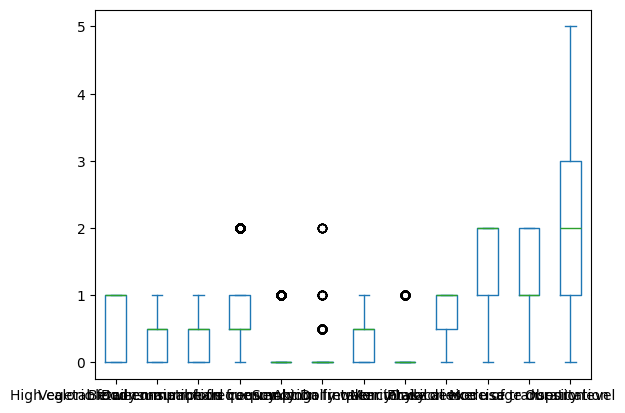

<Figure size 1500x600 with 0 Axes>

In [ ]:
data.iloc[:,5:17].plot(kind = "box")
plt.figure(figsize=(15, 6))
plt.show()

# **Renaming Column**

In [ ]:
data = data.rename(columns = {'Family history of overweight' : 'FHO',
                              'High caloric food consumption' : 'HCFC',
                              'Vegetable consumption frequency':'VCF',
                              'Daily main meals frequency' : 'DMMF',
                              'Between-meal food consumption frequency' : 'BMFCF',
                              'Smoking' : 'SMK',
                              'Alcohol intake' : 'ALK',
                              'Daily device usage duration' : 'DDUD',
                              'Monitor calories' : 'MC',
                              'Physical exercise' : 'PE',
                              'Obesity level' : 'OL',
                              'Mode of transportation' : 'MOT',
                              'Gender' : 'G',
                              'Daily water intake' : 'DWI'
                              })

In [ ]:
for col in data.columns:
    print(f'{col} : {data[col].unique()}')
    print()

G : [1 0]

Age : [29 25 23 22 19 24 30 16 32 18 26 20 44 21 34 36 28 52 51 37 35 27 40 41
 31 58 46 39 17 59 33 45 15 54 38 50 49 42 48 62 43 61 60 75 53 47 56 55
 57 67 70 65]

Height (m) : [1.65 1.7  1.68 1.75 1.55 1.57 1.83 1.8  1.73 1.63 1.6  1.42 1.52 1.45
 1.4  1.78 1.88 1.37 1.47 1.85 1.35 1.5  1.3  1.32 1.22]

Weight (kg) : [101.   53.   70.  112.   67.   90.   73.  110.   49.   46.   43.   69.
  52.   75.   60.   92.   88.  120.   65.  105.   61.   77.   78.   64.
  51.   91.   45.   47.  107.   82.   80.   96.  104.   62.   98.   94.
  58.  109.   55.  103.   48.   50.   85.   40.   99.   41.  113.   81.
 117.   44.  106.   54.   71.   97.   72.   38.  100.   63.   68.   76.
  93.   86.   89.   95.  115.   42.   56.  116.   74.   87.   79.   59.
  66.  118.  114.   57.   84.  102.  119.   83.  130.  127.  108.   35.
 123.   39.  111.  132.  122.  134.  135.   71.6 138.  125.  126.  150.
 140.  128.   36. ]

FHO : [1 0]

HCFC : [1 0]

VCF : [0.5 0.  1. ]

DMMF : [0.5 0.  1. ]


# **Input Features as X**


In [ ]:
X = data.iloc[:, 0:-1]
X

,G,Age,Height (m),Weight (kg),FHO,HCFC,VCF,DMMF,BMFCF,SMK,ALK,DWI,MC,PE,DDUD,MOT
0,1,29,1.65,101.0,1,1,0.5,0.5,1.0,0,0.0,0.5,0,1.0,2,2
1,0,25,1.65,53.0,0,0,0.0,0.5,2.0,0,0.0,0.5,0,0.0,2,1
2,1,23,1.70,70.0,0,0,0.0,0.0,0.5,1,0.5,1.0,0,1.0,2,1
3,1,22,1.68,112.0,1,1,0.5,0.5,1.0,0,0.0,0.5,0,1.0,2,1
4,1,19,1.75,67.0,0,1,0.0,0.5,0.5,1,0.0,0.5,0,0.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,1,18,1.63,41.0,0,0,0.5,0.5,0.5,0,0.0,0.5,0,1.0,2,1
2178,1,22,1.60,118.0,1,1,1.0,0.5,1.0,0,0.0,0.5,0,1.0,2,2
2179,1,24,1.75,79.0,1,1,0.0,0.0,0.0,0,0.0,0.0,1,0.0,2,2
2180,1,28,1.68,88.0,1,1,0.5,0.0,0.5,0,0.0,0.5,0,1.0,2,1


# **Target Variable as Y**


In [ ]:
y = data.iloc[:, -1]
y

,OL
0,4
1,1
2,1
3,4
4,1
...,...
2177,0
2178,5
2179,2
2180,3


# **Random Split of Train and Test data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Random Forest Model**


In [ ]:
rf = RandomForestClassifier()
rf

RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

# **Accuracy**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8375286041189931


# **Performance Metrics**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        70
           1       0.83      0.82      0.82       111
           2       0.68      0.82      0.75        73
           3       0.88      0.74      0.81        78
           4       0.89      0.87      0.88        54
           5       0.96      0.90      0.93        51

    accuracy                           0.84       437
   macro avg       0.85      0.85      0.85       437
weighted avg       0.84      0.84      0.84       437



# **Confusion Matrix**

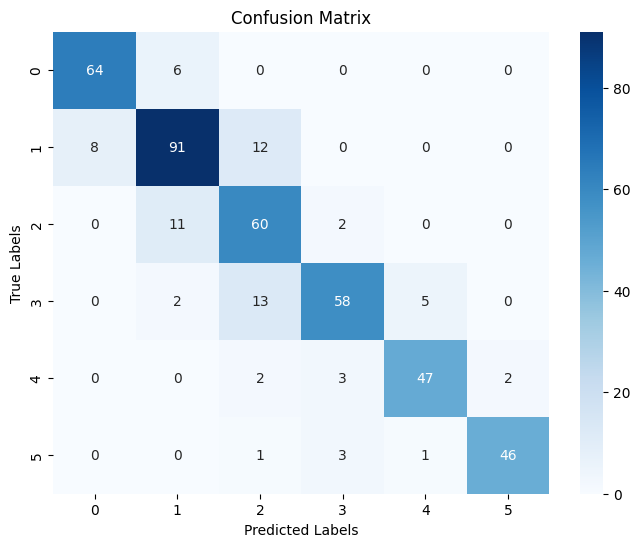

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
features = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['Importance'])
features.sort_values(by='Importance', ascending=False)

,Importance
Weight (kg),0.378130
Height (m),0.132111
Age,0.083777
BMFCF,0.073105
VCF,0.053014
DMMF,0.052011
HCFC,0.041456
PE,0.033069
FHO,0.027906
DDUD,0.026194


#**Creating Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  6,  0,  0,  0,  0],
       [ 8, 91, 12,  0,  0,  0],
       [ 0, 11, 60,  2,  0,  0],
       [ 0,  2, 13, 58,  5,  0],
       [ 0,  0,  2,  3, 47,  2],
       [ 0,  0,  1,  3,  1, 46]])

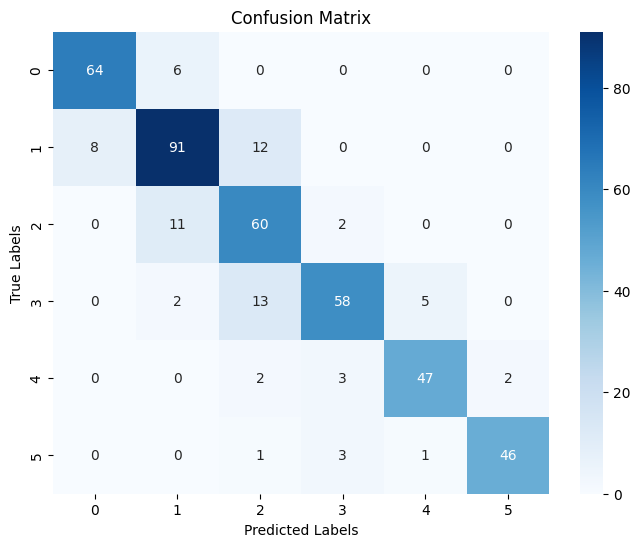

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")  # 'fmt="d"' ensures integer values in cells
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

#**Multinomial Logistic Regression**

#Accuracy

In [ ]:
mnl = LogisticRegression(multi_class='multinomial')

mnl.fit(X_train, y_train)

y_pred_mnl = mnl.predict(X_test)

accuracy_mnl = accuracy_score(y_test, y_pred_mnl)
print(f"Multinomial Logistic Regression Accuracy: {accuracy_mnl}")

Multinomial Logistic Regression Accuracy: 0.6750572082379863


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Performance Metrics

In [ ]:
print(classification_report(y_test, y_pred_mnl))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88        70
           1       0.73      0.72      0.72       111
           2       0.47      0.64      0.54        73
           3       0.66      0.35      0.45        78
           4       0.75      0.67      0.71        54
           5       0.64      0.86      0.73        51

    accuracy                           0.68       437
   macro avg       0.69      0.69      0.67       437
weighted avg       0.69      0.68      0.67       437



#Confusion Matrix

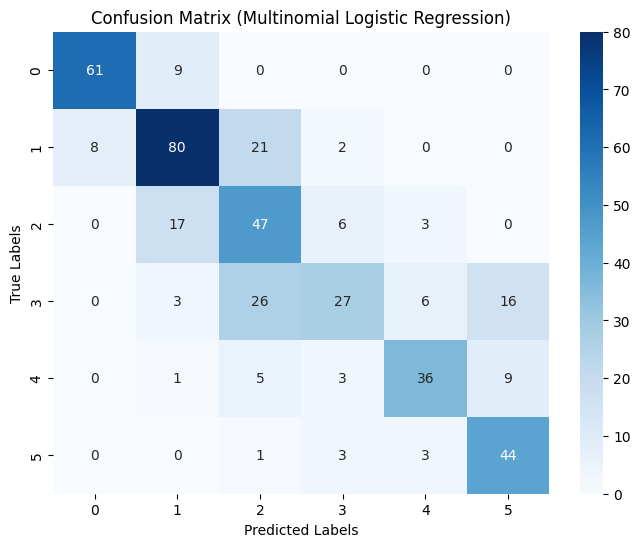

In [ ]:
cm_mnl = confusion_matrix(y_test, y_pred_mnl)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mnl, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Multinomial Logistic Regression)")
plt.show()